<a href="https://colab.research.google.com/github/UlkuTuncerKucuktas/K9wJZlA0F9ANqa3T/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1.   Data Preparation
2.   CRM Forecast
3.   Direct Forecast
4.   Google Ads Forecast
5.   Organic Search Forecast
6.   Refferal Search Forecast



**Data Preparation**

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [1]:
!unzip /content/drive/MyDrive/transactions.csv.zip

Archive:  /content/drive/MyDrive/transactions.csv.zip
  inflating: transactions.csv        
  inflating: __MACOSX/._transactions.csv  


In [2]:
import numpy as np
import pandas as pd

live_campain = pd.read_csv("/content/drive/MyDrive/live_digital_campaigns.csv")
economic_var =  pd.read_csv("/content/drive/MyDrive/economic_variables.csv")
economic_cal = pd.read_csv("/content/drive/MyDrive/economic_calendar.csv")
transactions = pd.read_csv("/content/transactions.csv")

In [3]:
transactions.head()

,pk,ga_transactionid,ga_datehour,ga_products,ga_channels,ga_itemquantity
0,146288072,2_50414543,2020082900,Product D,Facebook,1
1,146288071,2_50414542,2020082900,Product D,Organic search,1
2,146287503,2_50413935,2020082900,Product D,Organic search,1
3,146287504,2_50413936,2020082900,Product D,Organic search,1
4,146296436,3_65496155,2020082900,Product E,Google Ads,1


In [4]:
transactions["ga_datehour"] = pd.to_datetime(transactions["ga_datehour"], format='%Y%m%d%H')
transactions = transactions.rename(columns={"ga_datehour":"date"})
transactions['date'] = transactions['date'].apply(lambda x: x.date())
transactions.head()

,pk,ga_transactionid,date,ga_products,ga_channels,ga_itemquantity
0,146288072,2_50414543,2020-08-29,Product D,Facebook,1
1,146288071,2_50414542,2020-08-29,Product D,Organic search,1
2,146287503,2_50413935,2020-08-29,Product D,Organic search,1
3,146287504,2_50413936,2020-08-29,Product D,Organic search,1
4,146296436,3_65496155,2020-08-29,Product E,Google Ads,1


In [16]:
channeldf = transactions.pivot_table('ga_itemquantity',['date'],'ga_channels',aggfunc=np.sum)
channeldf.head()

ga_channels,CRM,Direct,Facebook,Google Ads,Organic search,Referral
date,,,,,,
2020-08-29,2420,337,2123,21985,4938,389
2020-08-30,2611,376,2812,24524,5878,505
2020-08-31,3282,500,2921,33484,7915,580
2020-09-01,20859,501,2547,32932,7588,614
2020-09-02,11520,550,3065,30143,6998,616


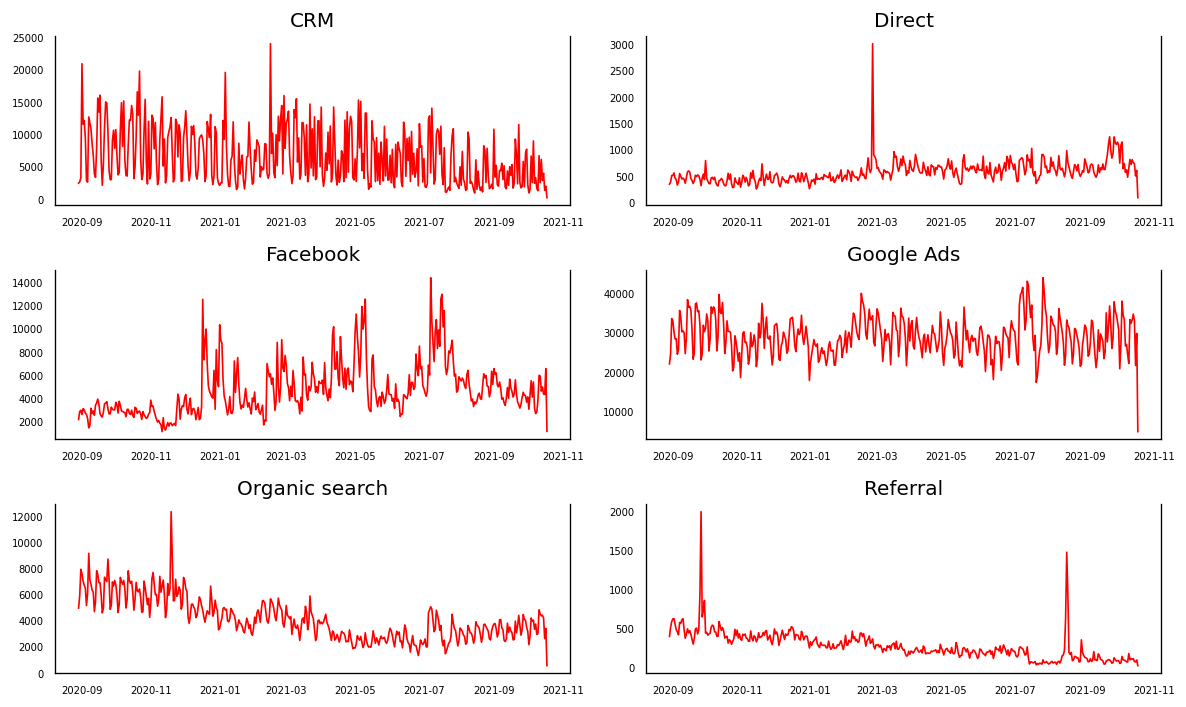

In [12]:

fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = channeldf[channeldf.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(channeldf.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

**CRM FORECAST**

In [42]:
from prophet import Prophet

CRMdf = channeldf["CRM"].copy()
CRMdf = CRMdf.to_frame()
CRMdf.reset_index(level=0, inplace=True)
CRMdf = CRMdf.rename(columns={"date":"ds","CRM":"y"})
CRMdf.head()

,ds,y
0,2020-08-29,2420
1,2020-08-30,2611
2,2020-08-31,3282
3,2020-09-01,20859
4,2020-09-02,11520


In [46]:
m = Prophet()
m.fit(CRMdf)
future = m.make_future_dataframe(periods=4)
forecast = m.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [47]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
415,2021-10-18,6264.616290,1990.336555,10410.033280
416,2021-10-19,6096.322308,1866.942278,10202.585115
417,2021-10-20,5344.601440,994.151563,9588.690972
418,2021-10-21,4935.630746,882.743768,9055.238302
419,2021-10-22,2594.551148,-1880.158440,6773.429282


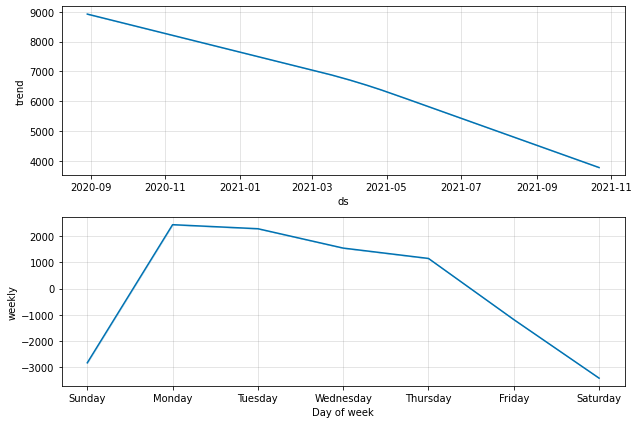

In [48]:
fig2 = m.plot_components(forecast)

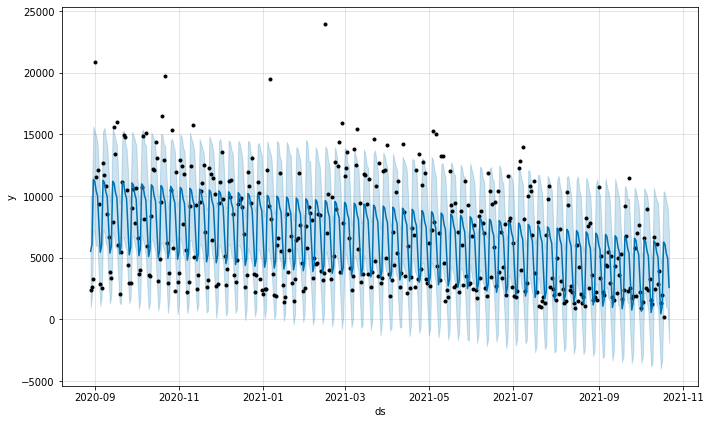

In [49]:
fig1 = m.plot(forecast)

**Direct Forecast**

In [50]:
from prophet import Prophet

Directdf = channeldf["Direct"].copy()
Directdf = Directdf.to_frame()
Directdf.reset_index(level=0, inplace=True)
Directdf = Directdf.rename(columns={"date":"ds","Direct":"y"})
Directdf.head()

,ds,y
0,2020-08-29,337
1,2020-08-30,376
2,2020-08-31,500
3,2020-09-01,501
4,2020-09-02,550


In [51]:
m = Prophet()
m.fit(Directdf)
future = m.make_future_dataframe(periods=4)
forecast = m.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [52]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
415,2021-10-18,786.898183,575.018511,1021.661051
416,2021-10-19,743.554993,508.219343,965.612660
417,2021-10-20,752.269057,522.436091,981.136889
418,2021-10-21,789.012779,583.330552,997.118450
419,2021-10-22,694.069827,478.146831,909.153037


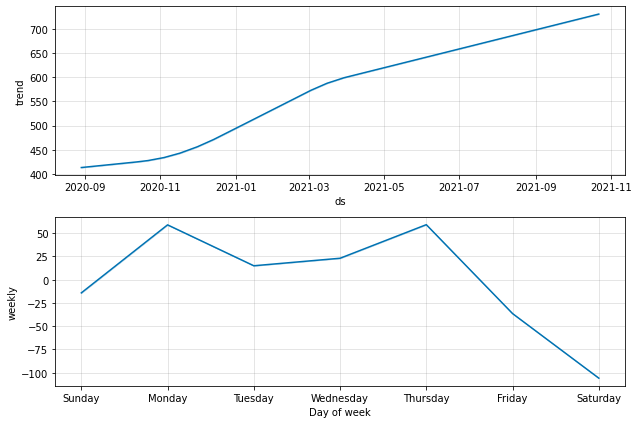

In [53]:
fig2 = m.plot_components(forecast)

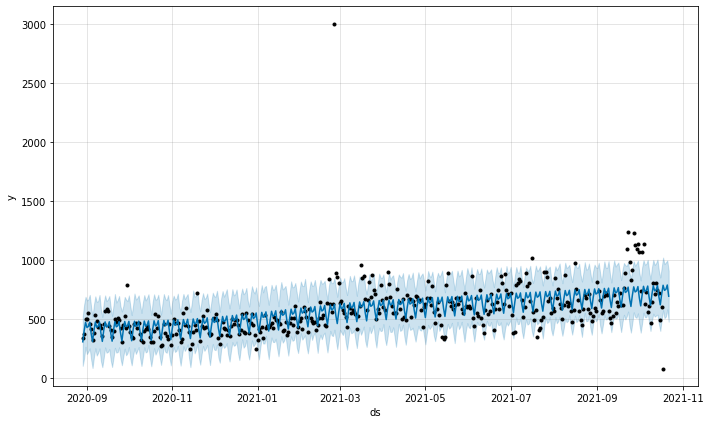

In [54]:
fig1 = m.plot(forecast)

**Facebook Forecast**

In [ ]:
from prophet import Prophet

Facebookdf = channeldf["Facebook"].copy()
Facebookdf = Facebookdf.to_frame()
Facebookdf.reset_index(level=0, inplace=True)
Facebookdf = Facebookdf.rename(columns={"date":"ds","Facebook":"y"})
Facebookdf.head()

,ds,y
0,2020-08-29,2123
1,2020-08-30,2812
2,2020-08-31,2921
3,2020-09-01,2547
4,2020-09-02,3065


In [ ]:
m = Prophet()
m.fit(Facebookdf)
future = m.make_future_dataframe(periods=4)
forecast = m.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
415,2021-10-18,4881.659370,2437.609582,7072.199957
416,2021-10-19,4370.478509,1979.201348,6652.565641
417,2021-10-20,4406.976853,2101.964442,6626.289841
418,2021-10-21,4466.057758,2183.276553,6888.526674
419,2021-10-22,4288.219438,1827.820140,6857.639719


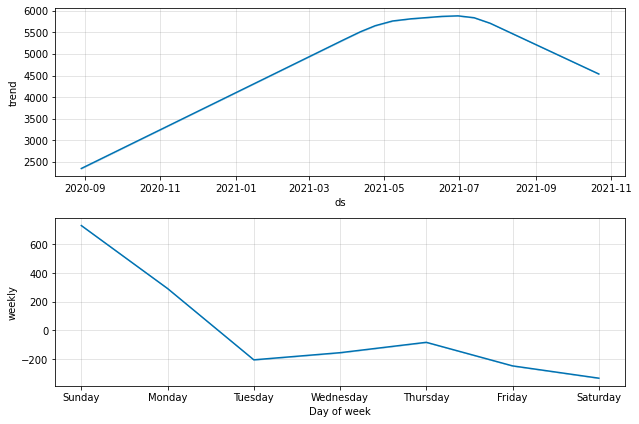

In [ ]:
fig2 = m.plot_components(forecast)

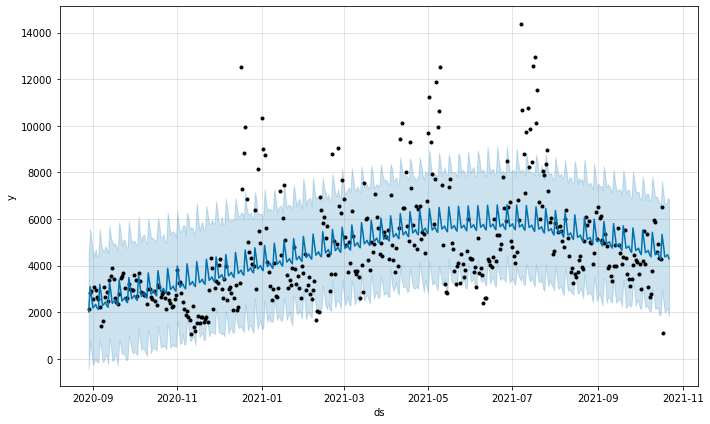

In [ ]:
fig1 = m.plot(forecast)

**Google Ads Forecast**

In [60]:
from prophet import Prophet

GoogleAdsdf = channeldf["Google Ads"].copy()
GoogleAdsdf = GoogleAdsdf.to_frame()
GoogleAdsdf.reset_index(level=0, inplace=True)
GoogleAdsdf = GoogleAdsdf.rename(columns={"date":"ds","Google Ads":"y"})
GoogleAdsdf.head()

,ds,y
0,2020-08-29,21985
1,2020-08-30,24524
2,2020-08-31,33484
3,2020-09-01,32932
4,2020-09-02,30143


In [61]:
m = Prophet()
m.fit(GoogleAdsdf)
future = m.make_future_dataframe(periods=4)
forecast = m.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [62]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
415,2021-10-18,32814.075364,28013.819894,37799.855173
416,2021-10-19,31330.129412,26337.240438,36091.083782
417,2021-10-20,30830.554776,25900.118848,35758.191966
418,2021-10-21,30200.753234,25327.207547,35411.891378
419,2021-10-22,27953.024412,23163.280692,32942.250985


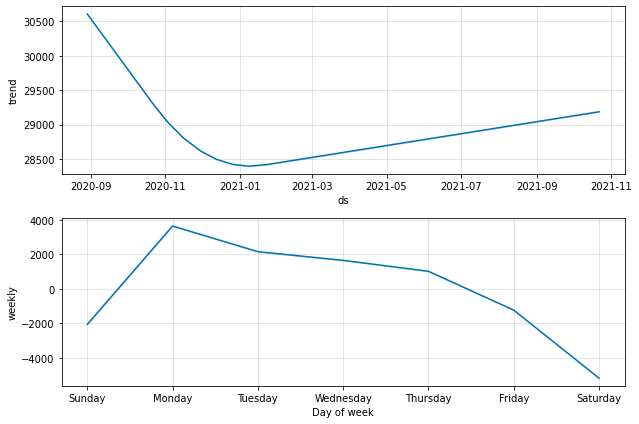

In [63]:
fig2 = m.plot_components(forecast)

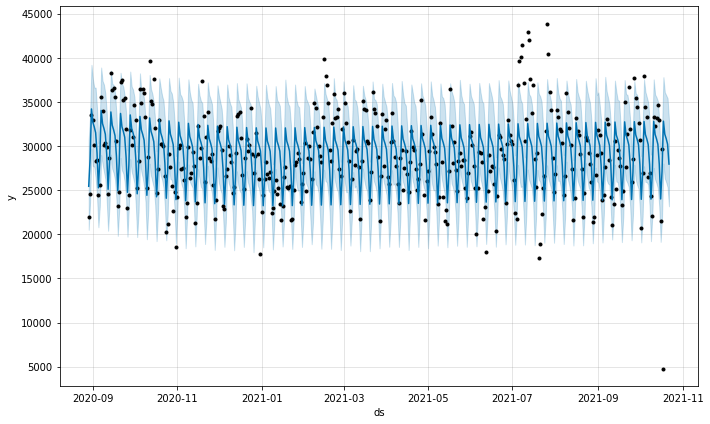

In [64]:
fig1 = m.plot(forecast)

**Organic search Forecast**

In [69]:
from prophet import Prophet

Organicdf = channeldf["Organic search"].copy()
Organicdf = Organicdf.to_frame()
Organicdf.reset_index(level=0, inplace=True)
Organicdf = Organicdf.rename(columns={"date":"ds","Organic search":"y"})
Organicdf.head()

,ds,y
0,2020-08-29,4938
1,2020-08-30,5878
2,2020-08-31,7915
3,2020-09-01,7588
4,2020-09-02,6998


In [70]:
m = Prophet()
m.fit(Organicdf)
future = m.make_future_dataframe(periods=4)
forecast = m.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [71]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
415,2021-10-18,4164.669283,3202.436477,5128.019955
416,2021-10-19,3854.689382,2885.612802,4820.964545
417,2021-10-20,3718.278853,2789.428591,4647.738168
418,2021-10-21,3791.901995,2816.787767,4720.966340
419,2021-10-22,3343.431970,2383.983262,4287.703022


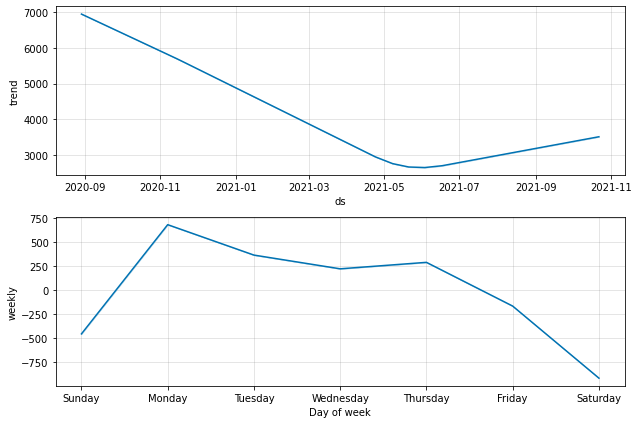

In [72]:
fig2 = m.plot_components(forecast)

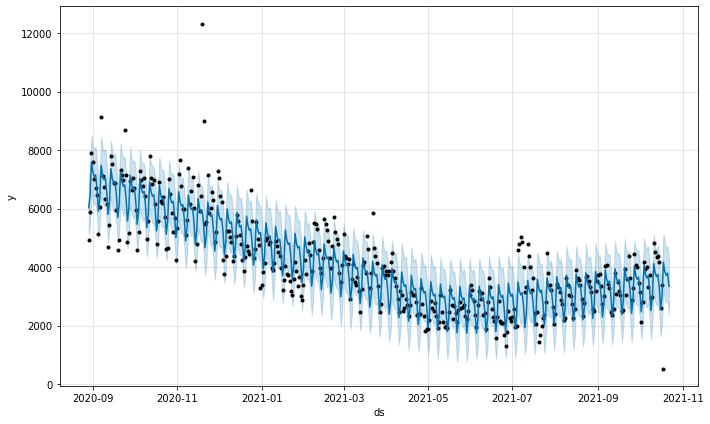

In [73]:
fig1 = m.plot(forecast)

**Referral Forecast**

In [75]:
from prophet import Prophet

Referaldf = channeldf["Referral"].copy()
Referaldf = Referaldf.to_frame()
Referaldf.reset_index(level=0, inplace=True)
Referaldf = Referaldf.rename(columns={"date":"ds","Referral":"y"})
Referaldf.head()

,ds,y
0,2020-08-29,389
1,2020-08-30,505
2,2020-08-31,580
3,2020-09-01,614
4,2020-09-02,616


In [76]:
m = Prophet()
m.fit(Referaldf)
future = m.make_future_dataframe(periods=4)
forecast = m.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [77]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
415,2021-10-18,131.337283,-32.304281,290.693506
416,2021-10-19,98.293930,-61.310859,265.141007
417,2021-10-20,71.704638,-81.934851,241.752418
418,2021-10-21,72.987550,-86.811563,239.798717
419,2021-10-22,55.451540,-97.870030,227.201676


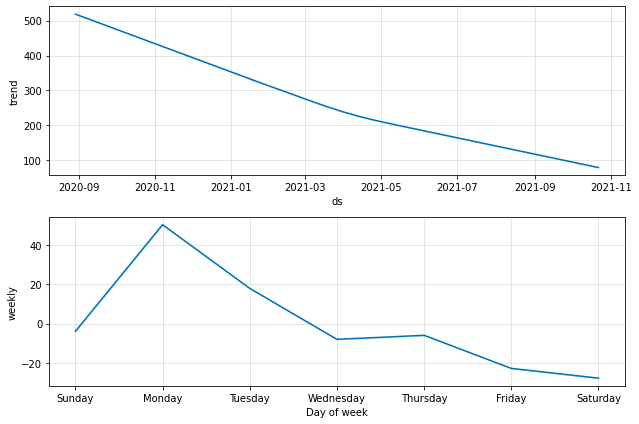

In [78]:
fig2 = m.plot_components(forecast)

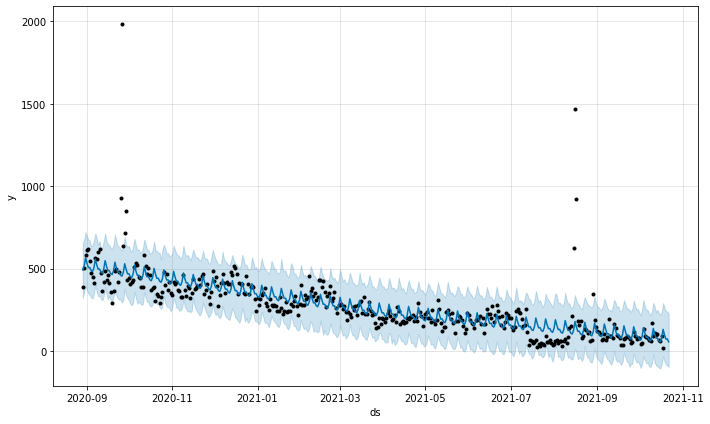

In [79]:
fig1 = m.plot(forecast)